In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# criando os dataframes
dftreino = pd.read_csv("../input/titanic/train.csv")
dfteste = pd.read_csv("../input/titanic/test.csv")
dftreino.info()
# Features númericas discretas = SibSp, Parch
# Features númericas contínuas = Age, Fare
features = ['Survived','Age','SibSp','Parch','Fare']
# Features categóricas = resto
display(dftreino)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
dftreino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Informações estatísticas

In [4]:
dftreino.isnull().sum()
# 177 NaN em Age e 687 em Cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# separando apenas as features de cada dataframe
treino = dftreino.loc[:,features]
teste = dfteste.loc[:,['Age','SibSp','Parch','Fare']]

# dropando os NaN do df de treino e trocando por 0 no de teste
treino = treino.dropna()
treino.isnull().sum()
teste = teste.fillna(0)

,Survived,Age,SibSp,Parch,Fare,AgeGrp
0,0,22.0,1,0,7.2500,Estudante
1,1,38.0,1,0,71.2833,Adulto
2,1,26.0,0,0,7.9250,Jovem Adulto
3,1,35.0,1,0,53.1000,Jovem Adulto
4,0,35.0,0,0,8.0500,Jovem Adulto
...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,Adulto
886,0,27.0,0,0,13.0000,Jovem Adulto
887,1,19.0,0,0,30.0000,Estudante
889,1,26.0,0,0,30.0000,Jovem Adulto


<AxesSubplot:xlabel='AgeGrp', ylabel='Survived'>

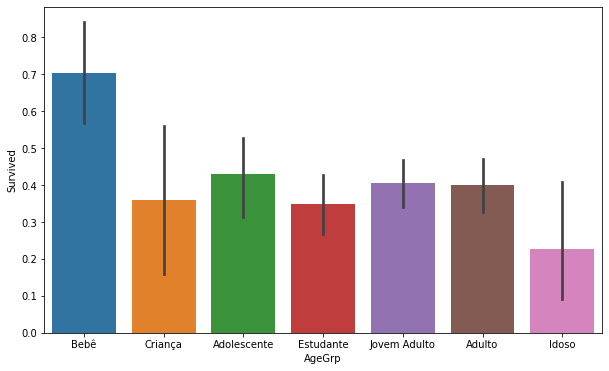

In [6]:
# separando as idades em grupos e as classificando
intvs = [0,5,12,18,24,35,60,np.inf] #bins
grupos = ['Bebê', 'Criança', 'Adolescente', 'Estudante', 'Jovem Adulto', 'Adulto', 'Idoso'] #labels
treino['AgeGrp'] = pd.cut(treino['Age'],intvs,labels = grupos) 
#teste['AgeGrp'] = pd.cut(treino['Age'],intvs,labels = grupos) ignore
display(treino)


plt.figure(figsize=(10,6))
sns.barplot(data=treino,x='AgeGrp',y='Survived') 

Bebês tinham a maior chance de sobreviver

Text(0.5, 0, 'Número de pais/filhos')

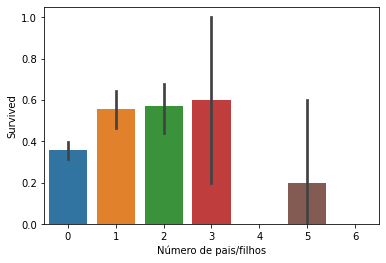

In [7]:
sns.barplot(data=treino,x = 'Parch',y='Survived')
plt.xlabel("Número de pais/filhos")

Pessoas com 3 pais ou filhos tinham mais chance de sobreviver

Text(0.5, 0, 'Número de irmãos/esposo(a)')

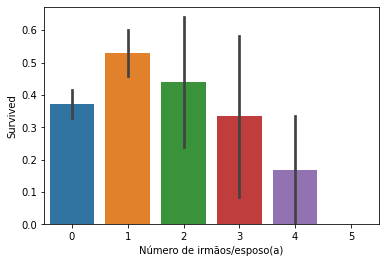

In [8]:
sns.barplot(data=treino,x = 'SibSp',y='Survived')
plt.xlabel("Número de irmãos/esposo(a)")

Pessoas com 1 irmão ou esposa tinham mais chance de sobreviver

In [9]:
# dividindo o dataframe de treino em train e validation
from sklearn.model_selection import train_test_split

X = treino.drop(['Survived','AgeGrp'],axis = 1)
target = treino["Survived"]
train_X, val_X, train_y, val_y = train_test_split(X, target,test_size=0.20, random_state = 0)

In [10]:
# treinando o modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

modelo_titanic = RandomForestClassifier()
modelo_titanic.fit(train_X,train_y)
predt = modelo_titanic.predict(val_X)
accuracy_score(predt,val_y)

0.6503496503496503

In [11]:
# Treinando utilizando o banco de dados completo
ind = dfteste['PassengerId']
predf = modelo_titanic.predict(teste)

output = pd.DataFrame({'PassengerId' : ind,'Survived' : predf })
output.to_csv('submission.csv',index = False)